# import libraries

In [67]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# read dataset

In [2]:
housing_dataset = fetch_california_housing(as_frame=True)

In [6]:
housing_df = housing_dataset.frame
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
housing_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

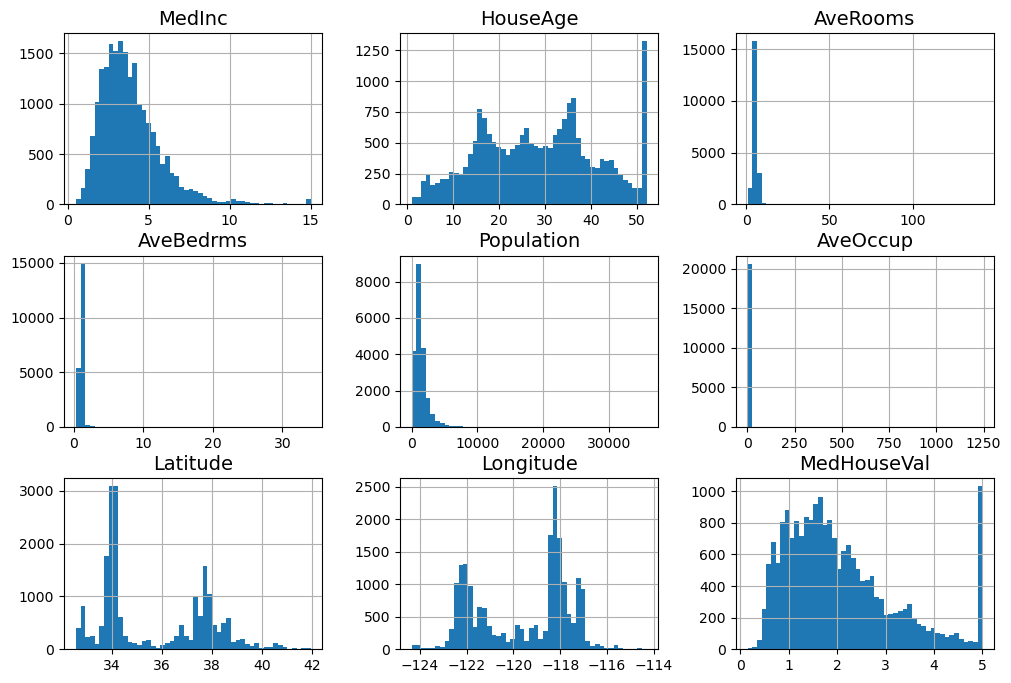

In [12]:
housing_df.hist(bins=50, figsize=(12, 8))
plt.show()

In [19]:
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)

In [26]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}\n")

print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (16512, 8)
y_train.shape: (16512,)

X_test.shape: (4128, 8)
y_test.shape: (4128,)


# transform data using standard scaler

In [30]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

print(f"X_train.shape: {X_train_standard.shape}")

print(f"X_test.shape: {X_test_standard.shape}")

X_train.shape: (16512, 8)
X_test.shape: (4128, 8)


In [34]:
regr = LinearRegression()

regr.fit(X_train_standard, y_train)

print(f"regr.score(X_train_standard, y_train): {regr.score(X_train_standard, y_train)}")
print(f"regr.score(X_test_standard, y_test): {regr.score(X_test_standard, y_test)}")

regr.score(X_train_standard, y_train): 0.6125511913966952
regr.score(X_test_standard, y_test): 0.575787706032451


# calculate  $R^2$(coefficient of determination) regression score function.



In [40]:
regr_pred_test = regr.predict(X_test_standard)
regr_pred_train = regr.predict(X_train_standard)

print(f"r2_score(y_test, regr_pred_test): {r2_score(y_test, regr_pred_test)}")
print(f"r2_score(y_train, regr_pred_train): {r2_score(y_train, regr_pred_train)}")

print(f"r2_score(y_train, regr_pred_train) - r2_score(y_test, regr_pred_test): {r2_score(y_train, regr_pred_train) - r2_score(y_test, regr_pred_test)}")

r2_score(y_test, regr_pred_test): 0.575787706032451
r2_score(y_train, regr_pred_train): 0.6125511913966952
r2_score(y_train, regr_pred_train) - r2_score(y_test, regr_pred_test): 0.03676348536424423


not big differences. the performance are close together. it is mild underfitting.

In [48]:
for i, j in zip(regr.coef_, X_train.columns.to_list()):
    print(i, j)

0.8543830309268549 MedInc
0.12254623807840803 HouseAge
-0.2944101344732987 AveRooms
0.33925949059448324 AveBedrms
-0.0023077231458303394 Population
-0.040829103085087796 AveOccup
-0.8969288766386666 Latitude
-0.8698417752417174 Longitude


In [50]:
z = zip(regr.coef_, X_train.columns.to_list())

sorted_z = sorted(z, key=lambda x: abs(x[0]), reverse=True)

for i, j in sorted_z:
    print(f"{i}:\t{j}")

-0.8969288766386666:	Latitude
-0.8698417752417174:	Longitude
0.8543830309268549:	MedInc
0.33925949059448324:	AveBedrms
-0.2944101344732987:	AveRooms
0.12254623807840803:	HouseAge
-0.040829103085087796:	AveOccup
-0.0023077231458303394:	Population


# Train ElasticNet

In [52]:
elastic_regr = ElasticNet(random_state=42, alpha=0.1, l1_ratio=0.5)

elastic_regr.fit(X_train_standard, y_train)

print(f"elastic_regr.score(X_train_standard, y_train): {elastic_regr.score(X_train_standard, y_train)}")
print(f"elastic_regr.score(X_test_standard, y_test): {elastic_regr.score(X_test_standard, y_test)}")

elastic_regr.score(X_train_standard, y_train): 0.5307617190050337
elastic_regr.score(X_test_standard, y_test): 0.5147647043408876


In [53]:
regr_pred_test = elastic_regr.predict(X_test_standard)
regr_pred_train = elastic_regr.predict(X_train_standard)

print(f"r2_score(y_test, regr_pred_test): {r2_score(y_test, regr_pred_test)}")
print(f"r2_score(y_train, regr_pred_train): {r2_score(y_train, regr_pred_train)}")

print(f"r2_score(y_train, regr_pred_train) - r2_score(y_test, regr_pred_test): {r2_score(y_train, regr_pred_train) - r2_score(y_test, regr_pred_test)}")

r2_score(y_test, regr_pred_test): 0.5147647043408876
r2_score(y_train, regr_pred_train): 0.5307617190050337
r2_score(y_train, regr_pred_train) - r2_score(y_test, regr_pred_test): 0.015997014664146048


In [54]:
z = zip(elastic_regr.coef_, X_train.columns.to_list())

sorted_z = sorted(z, key=lambda x: abs(x[0]), reverse=True)

for i, j in sorted_z:
    print(f"{i}:\t{j}")

0.713817571795691:	MedInc
-0.17573689237427495:	Latitude
0.13728796885465583:	HouseAge
-0.13325018373417746:	Longitude
-0.0:	AveRooms
0.0:	AveBedrms
0.0:	Population
-0.0:	AveOccup


# Create df of coefs

In [60]:
elastic_z = zip(elastic_regr.coef_, X_train.columns.to_list())
regr_z = zip(regr.coef_, X_train.columns.to_list())

sorted_elastic_z = sorted(elastic_z, key=lambda x: abs(x[0]), reverse=True)
sorted_regr_z = sorted(regr_z, key=lambda x: abs(x[0]), reverse=True)

elastic_df = pd.DataFrame(
    sorted_elastic_z,
    columns=["elastic_coef", "feature"]
)

regr_df = pd.DataFrame(
    sorted_regr_z,
    columns=["regr_coef", "feature"]
)

# merge on feature name
df = elastic_df.merge(
    regr_df,
    on="feature",
    how="outer"
)

df

,elastic_coef,feature,regr_coef
0,0.000000,AveBedrms,0.339259
1,-0.000000,AveOccup,-0.040829
2,-0.000000,AveRooms,-0.294410
3,0.137288,HouseAge,0.122546
4,-0.175737,Latitude,-0.896929
5,-0.133250,Longitude,-0.869842
6,0.713818,MedInc,0.854383
7,0.000000,Population,-0.002308


In [63]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(1))
df = df[cols]
df

,feature,elastic_coef,regr_coef
0,AveBedrms,0.000000,0.339259
1,AveOccup,-0.000000,-0.040829
2,AveRooms,-0.000000,-0.294410
3,HouseAge,0.137288,0.122546
4,Latitude,-0.175737,-0.896929
5,Longitude,-0.133250,-0.869842
6,MedInc,0.713818,0.854383
7,Population,0.000000,-0.002308


In [66]:
df['regr_coef - elastic_coef'] = df['regr_coef'] - df['elastic_coef']
df

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_9688\1295849549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regr_coef - elastic_coef'] = df['regr_coef'] - df['elastic_coef']


,feature,elastic_coef,regr_coef,regr_coef - elastic_coef
0,AveBedrms,0.000000,0.339259,0.339259
1,AveOccup,-0.000000,-0.040829,-0.040829
2,AveRooms,-0.000000,-0.294410,-0.294410
3,HouseAge,0.137288,0.122546,-0.014742
4,Latitude,-0.175737,-0.896929,-0.721192
5,Longitude,-0.133250,-0.869842,-0.736592
6,MedInc,0.713818,0.854383,0.140565
7,Population,0.000000,-0.002308,-0.002308


**Regularization**
  در یادگیری ماشین روشی است برای کنترل پیچیدگی مدل تا بتواند روی داده‌های جدید هم خوب عمل کند، نه فقط روی داده‌های آموزش.

  برای جلوگیری از یادگرفتن داده‌های نویز در مدل. مدل تنها الگوی موجود در داده را یاد بگیرد.

  در بیش برازش اندازه وزنها خیلی بزرگ میشوند و این منجر به افزایش واریانس مدل میشود. به همین دلیل سعی میشود تا اندازه وزنها را تا جای ممکن کوچک کرد. این کار واریانس را با بهای افزایش بایاس کاهش میدهد.

### loss function with regularization

$$
\text{Loss} = \text{MSE} + \lambda \cdot \text{Penalty}
$$

### L2 (Ridge)

$$
\lambda \sum w_i^2
$$

* ضرایب را **کوچک** می‌کند
* معمولاً صفر نمی‌کند
* مناسب برای زمانیست وقتی همه‌ی ویژگی‌ها مهم‌اند

### L1 (Lasso)

$$
\lambda \sum |w_i|
$$

* بعضی ضرایب را **دقیقاً صفر** می‌کند
* نوعی **feature selection**
* مناسب زمانیست که ویژگی‌های زائد زیاد داریم

### Elastic Net

$$
\lambda (\alpha \sum |w_i| + (1-\alpha)\sum w_i^2)
$$

* ترکیب L1 و L2
* پایدارتر وقتی ویژگی‌ها همبسته‌اند

### مشکل Lasso:

* وقتی ویژگی‌ها **همبسته (correlated)** باشند:

  * فقط **یکی** را نگه می‌دارد
  * بقیه را صفر می‌کند (تصادفی!)

📌 مثال:

```text
x1 = income
x2 = salary
```

این دو تقریباً یک چیزند → Lasso یکی را حذف می‌کند

❌ این می‌تواند از نظر دامنه‌ی مسئله غلط باشد

### مشکل Ridge:

* هیچ ضریبی را **کاملاً صفر نمی‌کند**
* مدل همچنان بزرگ و پیچیده می‌ماند
* Feature selection انجام نمی‌دهد

### ✅ ترکیب هوشمندانه:

* **L1** → حذف ویژگی‌های بی‌اهمیت
* **L2** → توزیع وزن بین ویژگی‌های همبسته

📌 نتیجه:

* اگر چند ویژگی همبسته مهم باشند → همه را نگه می‌دارد
* اگر ویژگی واقعاً بی‌اثر باشد → حذف می‌شود

## تفسیر هندسی (خیلی مهم ولی ساده)

* Lasso → ناحیه لوزی‌شکل → برخورد روی محور → صفر شدن ضرایب
* Ridge → ناحیه دایره‌ای → فقط کوچک شدن ضرایب
* Elastic Net → **بیضی با گوشه‌های نرم**

➡️ هم صفر شدن داریم، هم پایداری

![reg.jpg](reg.jpg)

## چرا Elastic Net برای داده‌های واقعی عالی است؟

Elastic Net بهترین انتخاب است وقتی:

✅ تعداد ویژگی‌ها زیاد است

✅ ویژگی‌ها همبسته‌اند

✅ می‌خواهیم feature selection + تعمیم‌پذیری

✅ داده نویزی است

به همین دلیل:

* در **bioinformatics**
* در **text / NLP**
* در **اقتصادسنجی**
  خیلی رایج است


  https://www.youtube.com/watch?v=t6E0Dt5rg9U

# dimension reduction

In [68]:
pca = PCA(n_components=5)

X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.fit_transform(X_test_standard)

print(f"X_train_pca.shape: {X_train_pca.shape}")
print(f"X_test_pca.shape: {X_test_pca.shape}")

X_train_pca.shape: (16512, 5)
X_test_pca.shape: (4128, 5)


In [69]:
regr_pca = LinearRegression()

regr_pca.fit(X_train_pca, y_train)

print(f"regr_pca.score(X_train_pca, y_train): {regr_pca.score(X_train_pca, y_train)}")
print(f"regr_pca.score(X_test_pca, y_test): {regr_pca.score(X_test_pca, y_test)}")

regr_pca.score(X_train_pca, y_train): 0.4567290821034099
regr_pca.score(X_test_pca, y_test): 0.38395923431695944


In [71]:
regr_pca_pred_test = regr_pca.predict(X_test_pca)
regr_pca_pred_train = regr_pca.predict(X_train_pca)

print(f"r2_score(y_test, regr_pca_pred_test): {r2_score(y_test, regr_pca_pred_test)}")
print(f"r2_score(y_train, regr_pca_pred_train): {r2_score(y_train, regr_pca_pred_train)}")

print(f"r2_score(y_train, regr_pca_pred_test) - r2_score(y_test, regr_pca_pred_test): {r2_score(y_train, regr_pca_pred_train) - r2_score(y_test, regr_pca_pred_test)}")

r2_score(y_test, regr_pca_pred_test): 0.38395923431695944
r2_score(y_train, regr_pca_pred_train): 0.4567290821034099
r2_score(y_train, regr_pca_pred_test) - r2_score(y_test, regr_pca_pred_test): 0.07276984778645046


linear regression   بهترین عملکرد

کاهش بعد همراه با کاهش کارایی شده

روشهای مدیریت اندازه وزنها اینجا تاثیری نگذاشته است. چون مدل پیچیدگی انچنانی برای یادگیری ندارد و اعمال پنالتی جدید روی تابع هزینه یادگیری را سختتر کرده است.